In [7]:
import pandas as pd
import numpy as np

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
data = pd.read_csv("data/preprocessed_df.csv")
data1 = pd.read_csv("data/preprocessed_df.csv")

In [10]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportSeqID,Origin,OriginCityName,OriginState,DestAirportSeqID,Dest,DestCityName,DestState,CRSDepTime,DepDelay,CRSArrTime,Cancelled,Diverted,CRSElapsedTime,Distance,DaysSince,is_holiday,is_day_before_holiday,is_holiday_week,MinSince,DepartureDensity,ArrivalDensity,TotalDensity,Visibility,WindSpeed,SevereWeather,BadWeather
0,2014,1,1,1,3,2014-01-01,OO,N724SK,4974,1039705,ATL,"Atlanta, GA",GA,1226603,IAH,"Houston, TX",TX,600,-3.0,721,0.0,0.0,141.0,689.0,0,1,0,1,360,6.0,4.0,10.0,10.0,5.0,0,0
1,2014,1,1,1,3,2014-01-01,AA,N002AA,1315,1039705,ATL,"Atlanta, GA",GA,1129803,DFW,"Dallas/Fort Worth, TX",TX,700,-2.0,830,0.0,0.0,150.0,731.0,0,1,0,1,420,16.0,34.0,50.0,10.0,5.0,0,0
2,2014,1,1,1,3,2014-01-01,UA,N76288,1134,1039705,ATL,"Atlanta, GA",GA,1393003,ORD,"Chicago, IL",IL,707,2.0,815,0.0,0.0,128.0,606.0,0,1,0,1,427,17.0,40.0,57.0,10.0,5.0,0,0
3,2014,1,1,1,3,2014-01-01,DL,N709DN,110,1039705,ATL,"Atlanta, GA",GA,1289203,LAX,"Los Angeles, CA",CA,810,21.0,1004,0.0,0.0,294.0,1947.0,0,1,0,1,490,49.0,92.0,141.0,10.0,3.0,0,0
4,2014,1,1,1,3,2014-01-01,DL,N654DL,1347,1039705,ATL,"Atlanta, GA",GA,1477101,SFO,"San Francisco, CA",CA,815,-2.0,1038,0.0,0.0,323.0,2139.0,0,1,0,1,495,52.0,92.0,144.0,10.0,3.0,0,0


In [11]:
data = data1.drop(columns = ['FlightDate', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginCityName', 'OriginState', 'OriginAirportSeqID', 'DestAirportSeqID', 'DestCityName', 'DestState', 'MinSince', 'DaysSince'])


In [12]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,CRSDepTime,DepDelay,CRSArrTime,Cancelled,Diverted,CRSElapsedTime,Distance,is_holiday,is_day_before_holiday,is_holiday_week,DepartureDensity,ArrivalDensity,TotalDensity,Visibility,WindSpeed,SevereWeather,BadWeather
0,2014,1,1,1,3,OO,ATL,IAH,600,-3.0,721,0.0,0.0,141.0,689.0,1,0,1,6.0,4.0,10.0,10.0,5.0,0,0
1,2014,1,1,1,3,AA,ATL,DFW,700,-2.0,830,0.0,0.0,150.0,731.0,1,0,1,16.0,34.0,50.0,10.0,5.0,0,0
2,2014,1,1,1,3,UA,ATL,ORD,707,2.0,815,0.0,0.0,128.0,606.0,1,0,1,17.0,40.0,57.0,10.0,5.0,0,0
3,2014,1,1,1,3,DL,ATL,LAX,810,21.0,1004,0.0,0.0,294.0,1947.0,1,0,1,49.0,92.0,141.0,10.0,3.0,0,0
4,2014,1,1,1,3,DL,ATL,SFO,815,-2.0,1038,0.0,0.0,323.0,2139.0,1,0,1,52.0,92.0,144.0,10.0,3.0,0,0


In [37]:
data = pd.get_dummies(data)

In [13]:
data['Delay'] = data['DepDelay'].apply(lambda x: 1 if x < 15.0 else 0)


In [14]:
data = data.drop(columns = ['DepDelay'])

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Delay', axis=1)
y = data['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [16]:
#the ratio of delay to non delay
print(y_train.value_counts())

Delay
1    1041032
0     270510
Name: count, dtype: int64


In [22]:
# turn all non-numerical data into numerical data, using .factorize()
object_cols = data.select_dtypes(include='object').columns
df_nums = data.copy()
for col in object_cols:
    df_nums[col], _ = pd.factorize(data[col])

#This shows the mapping of the categorical data to numerical data
print("Conversions of categorical data to numerical data:")
for col in object_cols:
    print(f"{col}:")
    print("Original:", data[col].unique())
    print("Converted:", df_nums[col].unique())

Conversions of categorical data to numerical data:
Reporting_Airline:
Original: ['OO' 'AA' 'UA' 'DL' 'WN']
Converted: [0 1 2 3 4]
Origin:
Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
Converted: [0 1 2 3 4 5 6 7 8]
Dest:
Original: ['IAH' 'DFW' 'ORD' 'LAX' 'SFO' 'DEN' 'PHX' 'CLT' 'ATL']
Converted: [0 1 2 3 4 5 6 7 8]


In [23]:
#undersample the majority class to balance the dataset
from imblearn.under_sampling import RandomUnderSampler

X = df_nums.drop('Delay', axis=1)
y = df_nums['Delay']

rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

print(y_train.value_counts())

Delay
0    270627
1    270125
Name: count, dtype: int64


In [24]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_classifier = xgb.XGBClassifier()

param_grid = {
    'max_depth': [3],
    'learning_rate': [0.2],
    'n_estimators': [100],
    'gamma': [0.2]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

y_pred = best_xgb_classifier.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_pred)

print(testing_accuracy)

0.6374678225878037


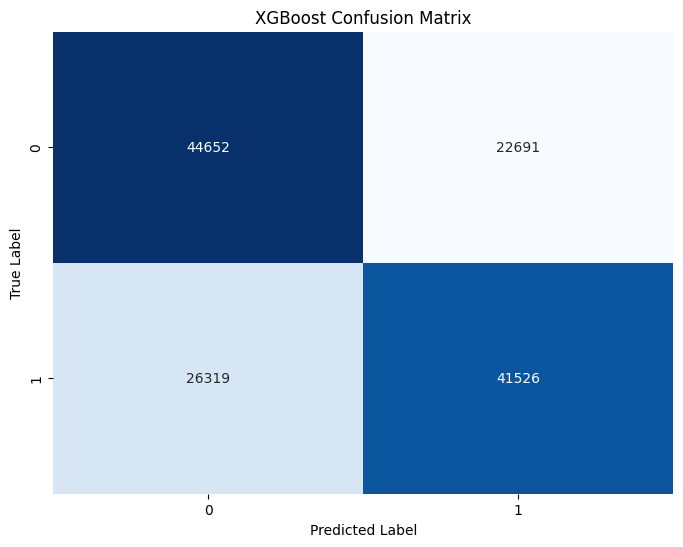

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = best_xgb_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [26]:
feature_importances = best_xgb_classifier.feature_importances_

top_feature_indices = feature_importances.argsort()[::-1]

top_features = [(X_train.columns[i], feature_importances[i]) for i in top_feature_indices]
print("Top features:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top features:
CRSDepTime: 0.20020921528339386
Visibility: 0.10947626084089279
Reporting_Airline: 0.07909681648015976
SevereWeather: 0.07337727397680283
Dest: 0.07116775959730148
Month: 0.05927981063723564
CRSArrTime: 0.054703325033187866
Year: 0.04368877038359642
Origin: 0.03794332966208458
DayofMonth: 0.03556424751877785
ArrivalDensity: 0.03257470205426216
BadWeather: 0.026702960953116417
Distance: 0.022878654301166534
DayOfWeek: 0.022055117413401604
WindSpeed: 0.020358167588710785
Cancelled: 0.016411151736974716
Quarter: 0.014872864820063114
is_day_before_holiday: 0.014555318281054497
is_holiday_week: 0.01327851414680481
is_holiday: 0.012921052984893322
DepartureDensity: 0.010681972838938236
Diverted: 0.009987507946789265
TotalDensity: 0.009524182416498661
CRSElapsedTime: 0.00869097001850605


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.6508343935852294


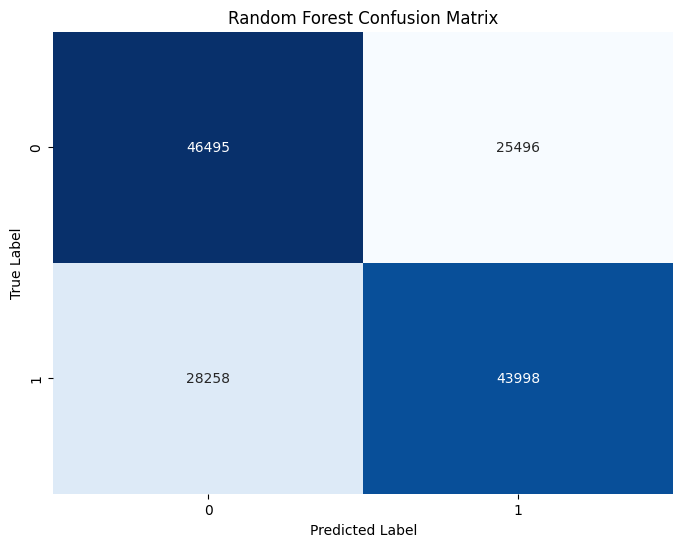

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [47]:
X_train

,Year,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,is_holiday_week,TotalDensity,Visibility,WindSpeed,SevereWeather,BadWeather
132876,2015,1,14,3,4,2,4,755,115.0,641.0,0,137.0,10.0,6.0,0,0
665039,2017,7,14,5,1,8,8,1300,291.0,2139.0,0,148.0,10.0,13.0,0,0
367345,2015,7,8,3,2,5,3,1610,80.0,370.0,0,124.0,10.0,14.0,0,0
611534,2014,6,24,2,0,8,1,1233,97.0,337.0,0,124.0,10.0,18.0,0,0
76696,2014,2,4,2,3,1,4,1515,180.0,936.0,0,75.0,2.0,9.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282558,2014,5,30,5,0,4,2,1916,157.0,862.0,0,64.0,10.0,8.0,1,0
599350,2018,9,2,7,2,7,2,1255,105.0,602.0,1,123.0,10.0,6.0,0,0
655237,2016,12,22,4,3,8,3,1200,117.0,651.0,1,97.0,10.0,5.0,0,0
370219,2015,8,13,4,0,5,5,1053,87.0,337.0,0,137.0,10.0,7.0,0,0


In [48]:
importances = rf_classifier.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. Feature 11 (0.167647)
2. Feature 2 (0.140290)
3. Feature 7 (0.135146)
4. Feature 13 (0.110571)
5. Feature 8 (0.104691)
6. Feature 3 (0.082607)
7. Feature 1 (0.069775)
8. Feature 0 (0.044865)
9. Feature 9 (0.030200)
10. Feature 12 (0.024937)
11. Feature 6 (0.024570)
12. Feature 4 (0.021949)
13. Feature 5 (0.019326)
14. Feature 10 (0.016658)
15. Feature 14 (0.003567)
16. Feature 15 (0.003203)


In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm_classifier = SVC()

param_grid = {
    'C': [1.0],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

y_pred = best_svm_classifier.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_pred)

print(testing_accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logistic_classifier = LogisticRegression()

param_grid = {
    'C': [1.0],
    'solver': ['liblinear'],
    'penalty': ['l2']
}

grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_logistic_classifier = grid_search.best_estimator_

y_pred = best_logistic_classifier.predict(X_test)

testing_accuracy = accuracy_score(y_test, y_pred)

print(testing_accuracy)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.5261487706009409
              precision    recall  f1-score   support

           0       0.66      0.10      0.18     67343
           1       0.52      0.95      0.67     67845

    accuracy                           0.53    135188
   macro avg       0.59      0.52      0.42    135188
weighted avg       0.59      0.53      0.42    135188



In [29]:

means = nb_classifier.theta_

variances = nb_classifier.var_

total_variance = variances.sum(axis=0)

feature_importance = (total_variance / total_variance.sum()) * 100

for i, importance in enumerate(feature_importance):
    print(f"Feature {i+1}: {importance:.2f}%")


Feature 1: 0.00%
Feature 2: 0.00%
Feature 3: 0.00%
Feature 4: 0.01%
Feature 5: 0.00%
Feature 6: 0.00%
Feature 7: 0.00%
Feature 8: 0.00%
Feature 9: 29.12%
Feature 10: 33.01%
Feature 11: 0.00%
Feature 12: 0.00%
Feature 13: 0.54%
Feature 14: 36.58%
Feature 15: 0.00%
Feature 16: 0.00%
Feature 17: 0.00%
Feature 18: 0.12%
Feature 19: 0.14%
Feature 20: 0.47%
Feature 21: 0.00%
Feature 22: 0.00%
Feature 23: 0.00%
Feature 24: 0.00%
